# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")



Processing record 1|punta arenas
Processing record 2|butaritari
Processing record 3|bluff
Processing record 4|kirakira
Processing record 5|airai
Processing record 6|lebu
Processing record 7|swan hill
Processing record 8|arraial do cabo
Processing record 9|geraldton
Processing record 10|suleja
Processing record 11|hithadhoo
City not found. skipping.
Processing record 12|kloulklubed
Processing record 13|puerto ayora
Processing record 14|kamaishi
Processing record 15|esperance
City not found. skipping.
Processing record 16|kruisfontein
Processing record 17|hilo
Processing record 18|kodiak
Processing record 19|cape town
Processing record 20|lata
Processing record 21|tiksi
Processing record 22|dongsheng
Processing record 23|georgetown
Processing record 24|tecpan
Processing record 25|pemba
Processing record 26|boa vista
Processing record 27|rikitea
Processing record 28|nouadhibou
Processing record 29|carnarvon
Processing record 30|ushuaia
Processing record 31|sao filipe
Processing record 32|

City not found. skipping.
Processing record 242|peruibe
Processing record 243|mantua
Processing record 244|micheweni
Processing record 245|oeiras do para
Processing record 246|chimore
Processing record 247|izhma
City not found. skipping.
Processing record 248|borogontsy
Processing record 249|graham
Processing record 250|bosanska gradiska
Processing record 251|keti bandar
Processing record 252|zhigansk
Processing record 253|cururupu
Processing record 254|armenia
Processing record 255|sinegorskiy
Processing record 256|staraya mayna
Processing record 257|santa fe
Processing record 258|beringovskiy
Processing record 259|caravelas
Processing record 260|norsup
Processing record 261|nicoya
City not found. skipping.
Processing record 262|troitskoye
City not found. skipping.
Processing record 263|havoysund
Processing record 264|mazyr
Processing record 265|cidreira
Processing record 266|kichmengskiy gorodok
Processing record 267|longyearbyen
Processing record 268|maceio
Processing record 269|fay

Processing record 484|chillicothe
Processing record 485|nabire
City not found. skipping.
Processing record 486|sault sainte marie
Processing record 487|axim
Processing record 488|moerai
Processing record 489|kalmunai
Processing record 490|natal
Processing record 491|bereda
Processing record 492|aqtobe
Processing record 493|miri
Processing record 494|bumba
Processing record 495|kolyshley
Processing record 496|camabatela
Processing record 497|san quintin
Processing record 498|taoudenni
Processing record 499|ivanjica
Processing record 500|lugovoy
Processing record 501|olga
Processing record 502|acapulco
Processing record 503|taksimo
Processing record 504|vestmannaeyjar
Processing record 505|hope
City not found. skipping.
Processing record 506|genhe
Processing record 507|la ronge
Processing record 508|kaka
Processing record 509|wawa
Processing record 510|kluczbork
Processing record 511|saint-tite
Processing record 512|yar-sale
Processing record 513|devarkonda
Processing record 514|ostersun

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Display the DataFrame
city_dataframe = pd.DataFrame({
                                "City Name": city_name,
                                "Country": country,
                                "Cloudiness": cloudiness, 
                                "Max Temp": max_temp, 
                                "Wind Speed": wind_speed,
                                "Humidity": humidity,
                                "Lat": lat, 
                                "Lng": lng,
                               })

city_dataframe = city_dataframe.rename_axis("City ID")
city_dataframe.head()

,City Name,Country,Cloudiness,Max Temp,Wind Speed,Humidity,Lat,Lng
City ID,,,,,,,,
0,Punta Arenas,CL,0,51.80,18.41,58,-53.1500,-70.9167
1,Butaritari,KI,70,81.88,14.97,77,3.0707,172.7902
2,Bluff,NZ,42,57.99,8.01,74,-46.6000,168.3333
3,Kirakira,SB,96,80.92,6.22,81,-10.4544,161.9205
4,Airai,TL,98,64.51,0.94,97,-8.9266,125.4092


In [35]:
# Export the city data into a .csv.
with open("python-api-challenge_WeatherPy", "w") as txt_file:
    
## not working

SyntaxError: unexpected EOF while parsing (<ipython-input-35-086a68bb254f>, line 2)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
plt.scatter(city_dataframe["lat"], city_dataframe["humidity"], marker="o", edgecolors="black")
plt.title(f"humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.show

KeyError: 'lat'

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

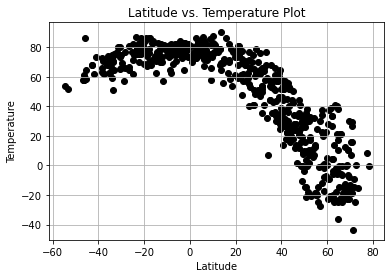

In [52]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"], marker = "o", color = "black", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
plt.show

## need to shave to .pngs

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression